# Student Performance Factors Dataset Analysis


* Data Preprocessing
* Missing Data Analysis
* Data Visualization
* Model Building with sklearn Library
* Discover Feature Importances


# Data Preprocessing

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer,mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## Import Dataset

In [2]:
df=pd.read_csv("/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv")

## Diving to Data

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


* Hours_Studied: Number of hours spent studying per week.

* Attendance: Percentage of classes attended.

* Parental_Involvement: Level of parental involvement in the student's education (Low, Medium, High).

* Access_to_Resources: Availability of educational resources (Low, Medium, High).

* Extracurricular_Activities: Participation in extracurricular activities (Yes, No).

* Sleep_Hours: Average number of hours of sleep per night.

* Previous_Scores: Scores from previous exams.

* Motivation_Level: Student's level of motivation (Low, Medium, High).

* Internet_Access: Availability of internet access (Yes, No).

* Tutoring_Sessions: Number of tutoring sessions attended per month.

* Family_Income: Family income level (Low, Medium, High).

* Teacher_Quality: Quality of the teachers (Low, Medium, High).

* School_Type: Type of school attended (Public, Private).

* Peer_Influence: Influence of peers on academic performance (Positive, Neutral, Negative).

* Physical_Activity: Average number of hours of physical activity per week.

* Learning_Disabilities: Presence of learning disabilities (Yes, No).

* Parental_Education_Level: Highest education level of parents (High School, College, Postgraduate).

* Distance_from_Home: Distance from home to school (Near, Moderate, Far).

* Gender: Gender of the student (Male, Female).

* Exam_Score: Final exam score.

In [4]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


> As seen, there is one student with a test score of 101. We will update this to 100. Although it won't significantly affect the data, let's maintain discipline.

In [5]:
index_list = df[df['Exam_Score'] > 100].index

print(index_list)

Index([1525], dtype='int64')


In [6]:
df.iloc[1525]

Hours_Studied                          27
Attendance                             98
Parental_Involvement                  Low
Access_to_Resources                Medium
Extracurricular_Activities            Yes
Sleep_Hours                             6
Previous_Scores                        93
Motivation_Level                      Low
Internet_Access                        No
Tutoring_Sessions                       5
Family_Income                        High
Teacher_Quality                      High
School_Type                        Public
Peer_Influence                   Positive
Physical_Activity                       3
Learning_Disabilities                  No
Parental_Education_Level      High School
Distance_from_Home               Moderate
Gender                             Female
Exam_Score                            101
Name: 1525, dtype: object

In [7]:
df.loc[1525, 'Exam_Score'] = 100

## Missing Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

> It is noticeable that there are some missing values in certain columns. In fact, since the rows with missing data are very few compared to the rest of the dataset, we could have deleted them. However, today I will prefer to replace them with the most frequent values in the rows.

In [9]:
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

# EDA

* Here we go!

## Categorical x Numerical Columns

In [11]:
df.nunique()

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    44
dtype: int64

> 

> Here, we will convert our categorical data into numerical form, which will make the analysis and modeling processes more efficient. Additionally, by scaling our numerical data, we will build our model more effectively. While this step is not mandatory, it will improve the results.

In [12]:
categorical_columns = [
    'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 
    'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level',
    'Distance_from_Home', 'Gender'
]

numerical_columns = [
    'Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 
    'Physical_Activity', 'Exam_Score'
]

label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

scaler = StandardScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [13]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.504942,0.348375,1,0,0,-0.019796,-0.143800,1,1,-1.213934,1,2,1,2,0.031411,0,1,2,1,-0.060559
1,-0.162822,-1.383736,1,2,0,0.661399,-1.116110,1,1,0.411451,2,2,1,0,1.001199,0,0,1,0,-1.603425
2,0.671882,1.560853,2,2,1,-0.019796,1.106313,2,1,0.411451,2,2,1,1,1.001199,0,2,2,1,1.739451
3,1.506587,0.781403,1,2,1,0.661399,1.592469,2,1,-0.401242,2,2,1,0,1.001199,0,1,1,1,0.968018
4,-0.162822,1.041220,2,2,1,-0.700990,-0.699406,2,1,1.224144,2,0,1,1,1.001199,0,0,2,0,0.710873


## Visualizations

> Honestly, we could use sns.pairplot here to visualize the relationships between all the columns, but considering the number of columns, it results in a rather difficult and complex chart to interpret. We will focus on examining the more significant relationships.

<Axes: >

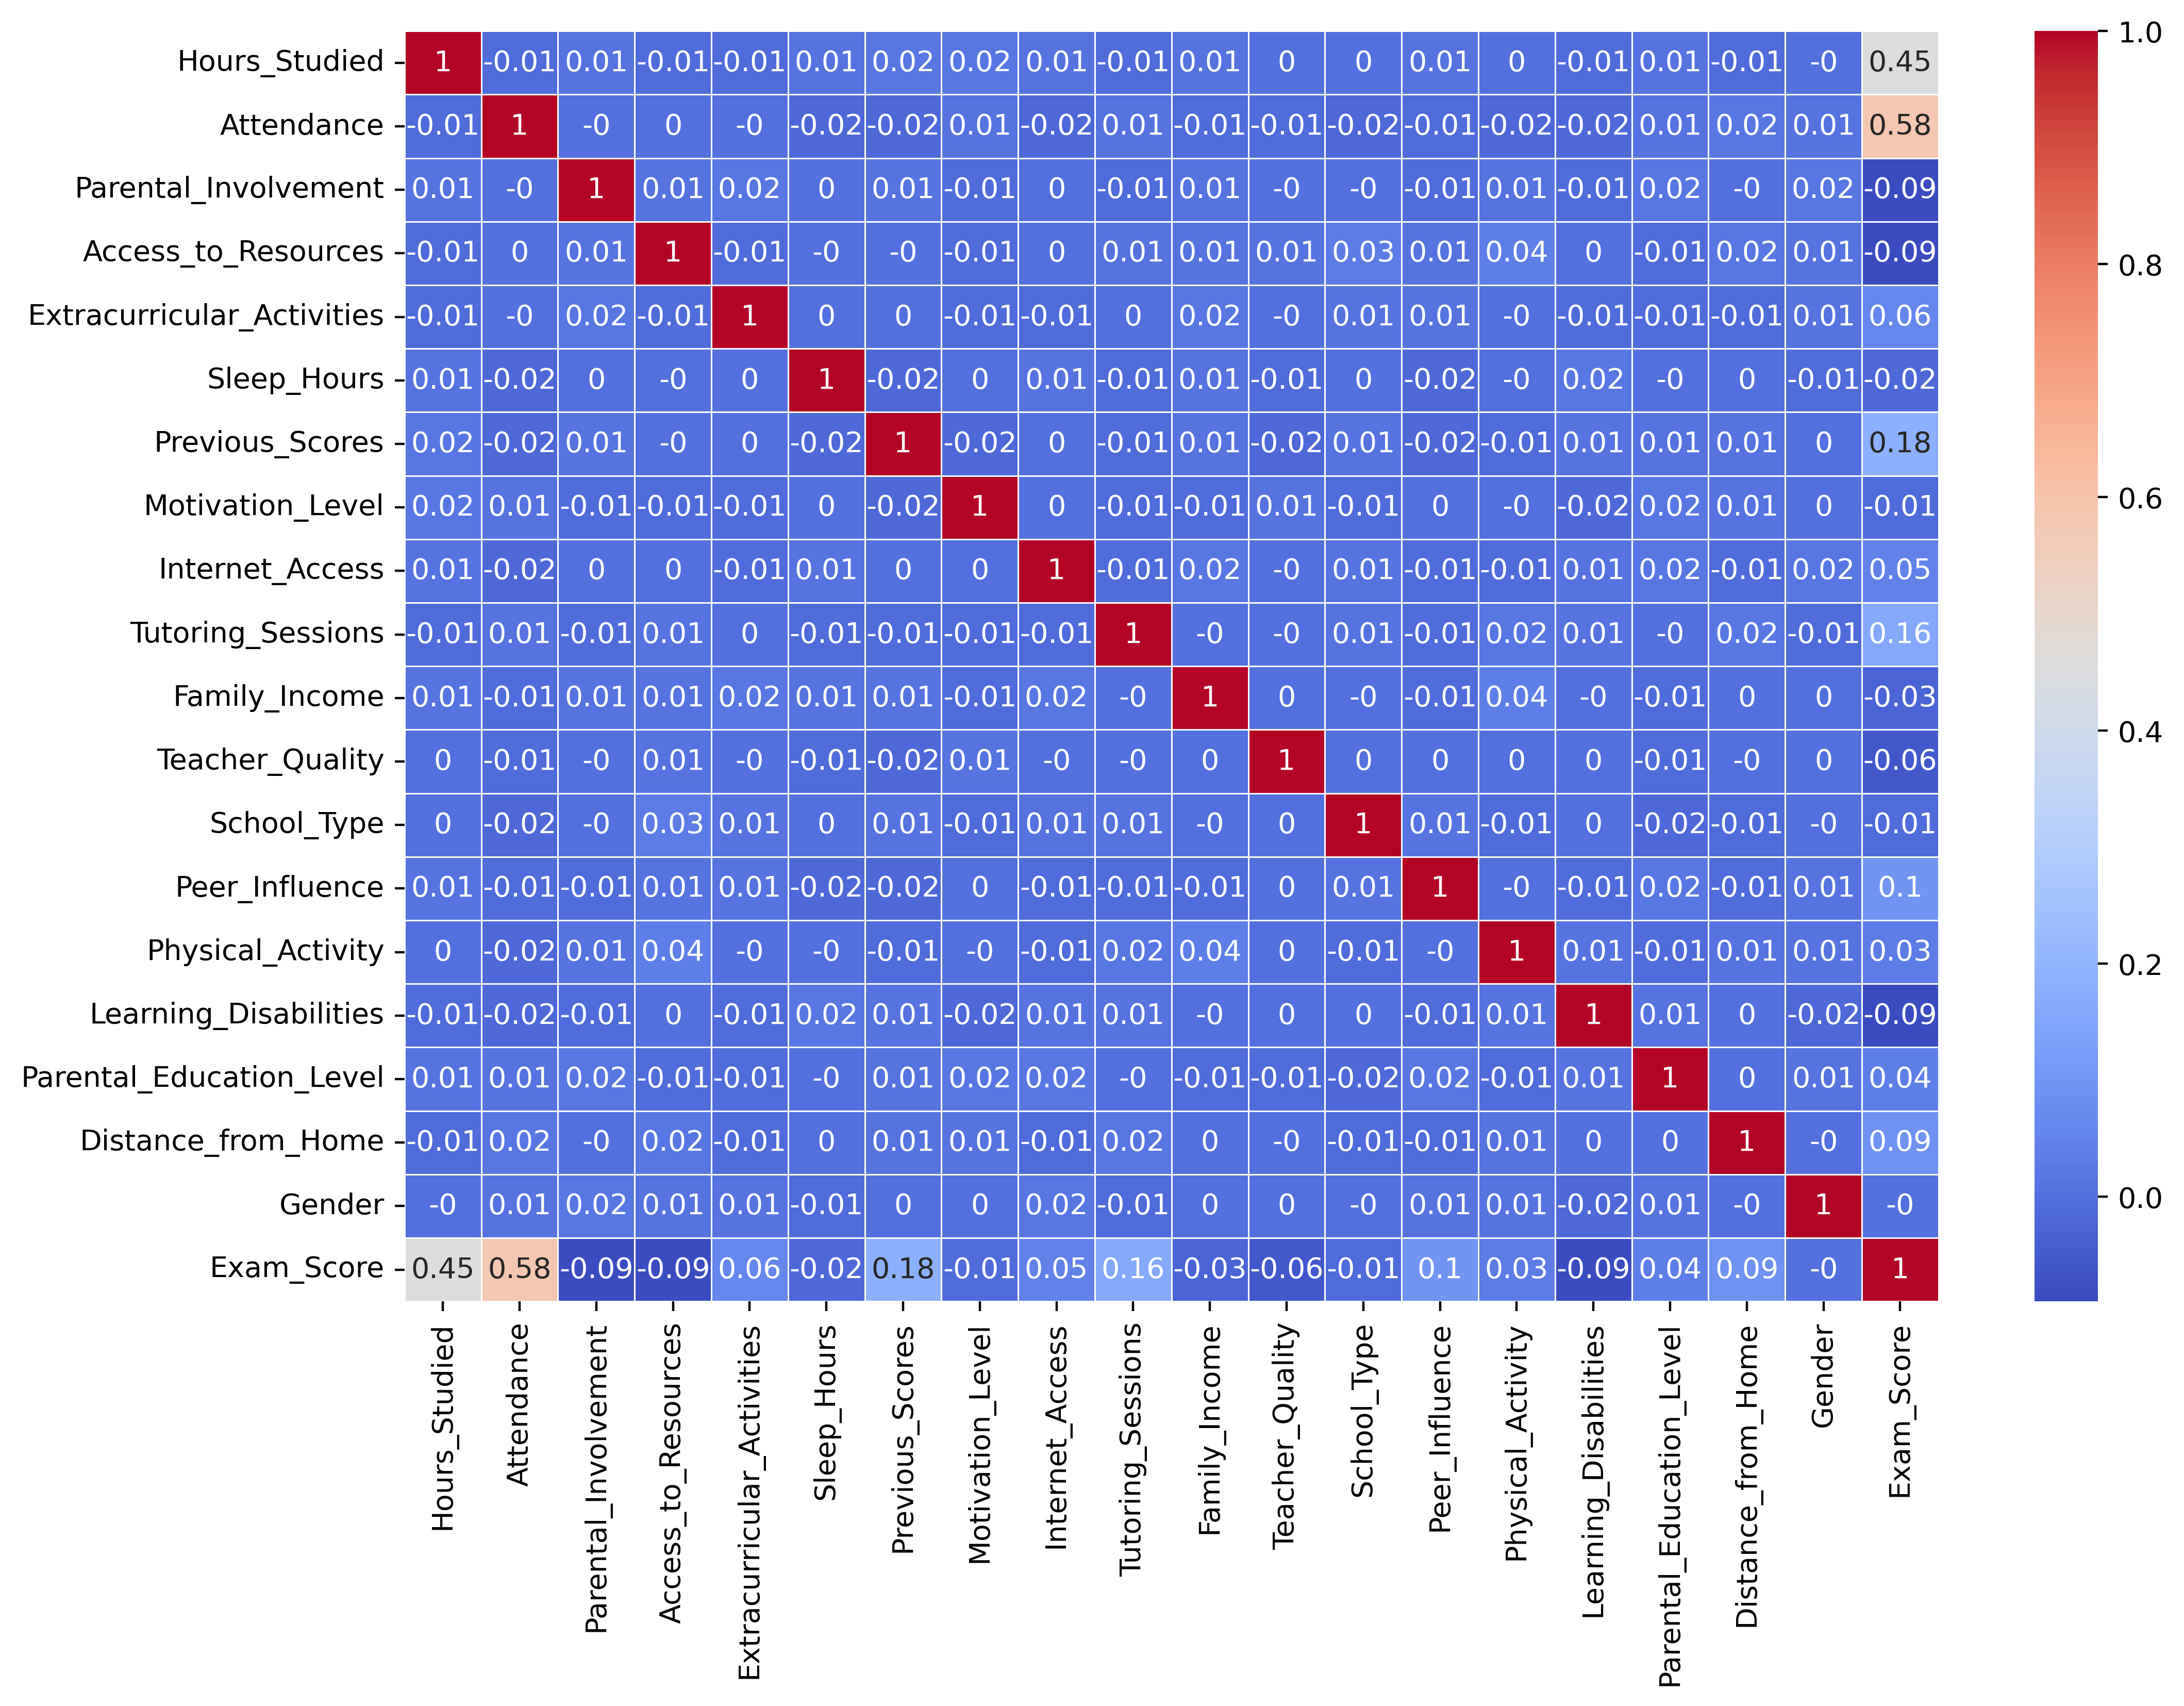

In [14]:
plt.figure(figsize=(12,8),dpi=400)
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm', linewidths=0.5)

> Aside from ***Attendance*** and ***Exam Score***, no significant correlation stands out. The reason for this relatively high correlation might be that students with higher attendance generally perform better in areas like studying, focus, and parental involvement.

<Axes: xlabel='Exam_Score', ylabel='Attendance'>

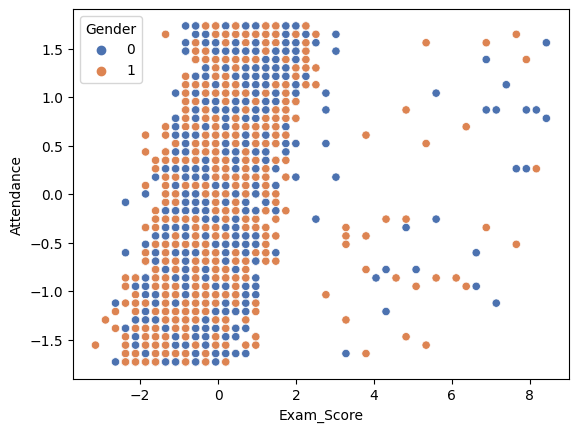

In [15]:
sns.scatterplot(x="Exam_Score",y="Attendance",hue="Gender",data=df,palette="deep")

> Although there is a general pattern, there are also data points that do **not** fit this pattern.

<Axes: xlabel='Exam_Score', ylabel='Hours_Studied'>

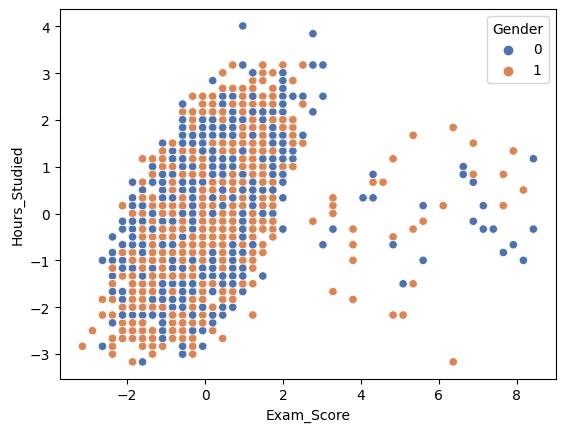

In [16]:
sns.scatterplot(x="Exam_Score",y="Hours_Studied",hue="Gender",data=df,palette="deep")

> What we mentioned for the previous chart also applies to this chart.

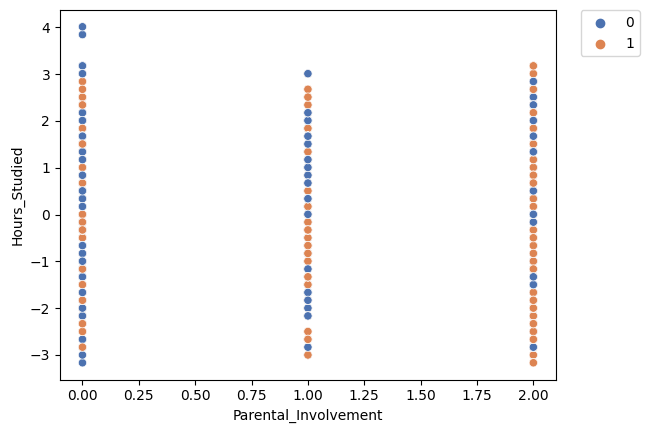

In [17]:
sns.scatterplot(x="Parental_Involvement",y="Hours_Studied",hue="Gender",data=df,palette="deep")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

> It seems that we cannot establish a clear relationship between parental involvement and study hours. An unexpected result.

<Axes: xlabel='Exam_Score', ylabel='School_Type'>

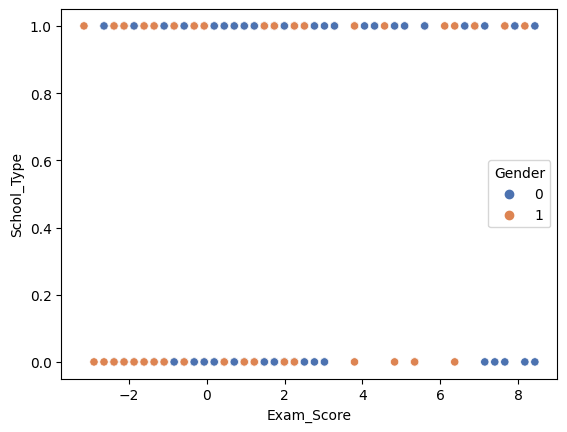

In [18]:
sns.scatterplot(x="Exam_Score",y="School_Type",hue="Gender",data=df,palette="deep")

> Does the poor ever smile? It is clear that students attending private schools have higher grades. This could be related to factors such as the quality of education and parental involvement, **but it should be noted** that the difficulty of exams and grading metrics in private schools can vary.

# Modelling Process

## Train Test Split

In [19]:
X=df.drop("Exam_Score",axis=1)
y=df["Exam_Score"]

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=13)

* Since our dataset is small, the test size was set to **0.1**, but different parameters can be tried.

## Linear Regression

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R^2 :       ", round(r2_score(y_test,y_pred),2))
print("MAE :       ", round(mean_absolute_error(y_test,y_pred),2))
print("RMSE :      ", round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

R^2 :        0.61
MAE :        0.28
RMSE :       0.62


* Our MAE and RMSE values can be considered quite good, given that the average exam score is 67.23. However, our **R² value is low**, indicating that our model only explains 61% of the data. 

* We will try using different methods to achieve better results.

## Gradient Boosting

In [22]:
gb_model = GradientBoostingRegressor(random_state=42)

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("R^2 :       ", round(r2_score(y_test,y_pred_gb),2))
print("MAE :       ", round(mean_absolute_error(y_test,y_pred_gb),2))
print("RMSE :      ", round(np.sqrt(mean_squared_error(y_test,y_pred_gb)),2))

R^2 :        0.66
MAE :        0.22
RMSE :       0.58


* Better, but still not the best in my opinion.

## Random Forest

In [23]:
rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("R^2 :       ", round(r2_score(y_test,y_pred_rf),2))
print("MAE :       ", round(mean_absolute_error(y_test,y_pred_rf),2))
print("RMSE :      ", round(np.sqrt(mean_squared_error(y_test,y_pred_rf)),2))

R^2 :        0.6
MAE :        0.3
RMSE :       0.63


* Booo! Worse results! Let's see what we can do with GridSearchCV.

In [24]:
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, n_jobs=-1, verbose=2)
rf_grid.fit(X_train, y_train)

best_rf_model = rf_grid.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

print(f"Best RF Model R²: {r2_score(y_test, y_pred_rf)}")
print(f"Best RF Model MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Best RF Model RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=200; total time=   4.8s
[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=500; total time=  11.2s
[CV] END max_depth=10, max_features=auto, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, max_features=auto, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200; total time=   4.4s
[CV] END max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200; total time=   4.3s
[CV] END max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500; total time=  11.8s
[CV] END max_depth=10, max_features=auto, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200; total time=   4.2

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best RF Model R²: 0.6227290132870138
Best RF Model MAE: 0.2865759824519221
Best RF Model RMSE: 0.6118636072794917


Results:
* Best RF Model R²: 0.6227290132870138
* Best RF Model MAE: 0.2865759824519221
* Best RF Model RMSE: 0.6118636072794917

> It seems that we won't get anywhere with random forest. Let's perform a **Hyperparameter Search** and **Cross Validation** with Gradient Boosting.

## Gradient Boosting x Hyperparameter Search x Cross Validation

In [25]:
gb_params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_params, cv=5, n_jobs=-1, verbose=2)
gb_grid.fit(X_train, y_train)

best_gb_model = gb_grid.best_estimator_
mse_scorer = make_scorer(mean_squared_error)

cv_scores_gb_mse = cross_val_score(best_gb_model, X_train, y_train, cv=5, scoring=mse_scorer)

cv_scores_gb_rmse = np.sqrt(cv_scores_gb_mse)

cv_scores_gb_r2 = cross_val_score(best_gb_model, X_train, y_train, cv=5, scoring='r2')

print(f"Best Gradient Boosting Cross-Validation MSE: {cv_scores_gb_mse.mean()}")
print(f"Best Gradient Boosting Cross-Validation RMSE: {cv_scores_gb_rmse.mean()}")
print(f"Best Gradient Boosting Cross-Validation R²: {cv_scores_gb_r2.mean()}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   3.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=500; total time=   6.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   2.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   2.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=500; total time=   5.5s
[CV] END max_depth=30, max_features=s

Results:
* Best Gradient Boosting Cross-Validation MSE: 0.2962433981301332
* Best Gradient Boosting Cross-Validation RMSE: 0.5418291717448956
* Best Gradient Boosting Cross-Validation R²: 0.7042434324407669

> Much better! Although there isn't a significant improvement in our MSE and RMSE values, our R² score is much better. **Our model can now generalize to 70.4% of the data**. **Cross-validation** and **grid search** have improved things.

# Feature Importance

In [26]:
importances_gb_best = best_gb_model.feature_importances_
sorted_indices_gb_best = np.argsort(importances_gb_best)[::-1]

print("\nFeature Importances:")
for idx in sorted_indices_gb_best[:10]:
    print(f"{X_train.columns[idx]}: {round(importances_gb_best[idx],2)}")


Feature Importances:
Attendance: 0.45
Hours_Studied: 0.28
Previous_Scores: 0.05
Access_to_Resources: 0.04
Parental_Involvement: 0.04
Tutoring_Sessions: 0.04
Family_Income: 0.02
Peer_Influence: 0.01
Motivation_Level: 0.01
Parental_Education_Level: 0.01


> As expected, Attendance and Hours_Studied emerged as the features with the highest importance. The fact that the importance values of the others are so low is something worth reflecting on.

# Conclusion

I believe this has been a good piece of work. We obtained valuable insights, especially in the visualization processes. We tried to achieve the best results by using three different approaches. We aimed to improve the results using Gradient Boosting along with hyperparameter search and cross-validation. Different models might yield better or worse results. If you have any work or feedback, I would love to hear from you! 

Take care, with best regards!